# Heart Desease Classification

## source information
- https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Detail about the data set

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.
In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 
The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

**Attribute Information (Only 14 attributes used) :**
1. age : age in years
2. sex : sex (1 = male; 0 = female)
3. cp : chest pain type
        - Value 1: typical angina
        - Value 2: atypical angina
        - Value 3: non-anginal pain
        - Value 4: asymptomatic
4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)
5. chol : serum cholestoral in mg/dl
6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg : resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach : maximum heart rate achieved
9. exang : exercise induced angina (1 = yes; 0 = no)
10. oldpeak : ST depression induced by exercise relative to rest
11. slope : the slope of the peak exercise ST segment
        - Value 1: upsloping
        - Value 2: flat
        - Value 3: downsloping
12. ca : number of major vessels (0-3) colored by flourosopy
13. thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target : diagnosis of heart disease (angiographic disease status)
        - Value 0: < 50% diameter narrowing
        - Value 1: > 50% diameter narrowing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.preprocessing import StandardScaler, PowerTransformer, binarize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format='svg'

pd.set_option('display.max_rows', 10)

## Load data

In [2]:
url = 'https://github.com/lujing-dax/datascience/raw/main/processed.hungarian.data.csv'
df = pd.read_csv(url, na_values='?')
df.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   slope  ca  thal  target  
0    NaN NaN   NaN       0  
1    NaN NaN   NaN       0  
2    NaN NaN   NaN       0  
3    NaN NaN   6.0       0  
4    NaN NaN   NaN       0

## Cleansing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# There are 3 columns with a lot of Null values and we'll get rid of them.

df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'target']]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    float64
 6   restecg   261 non-null    float64
 7   thalach   261 non-null    float64
 8   exang     261 non-null    float64
 9   oldpeak   261 non-null    float64
 10  target    261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


In [6]:
df.sample(10)

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
148   54    1   2     110.0  208.0  0.0      0.0    142.0    0.0      0.0   
230   45    1   4     130.0  219.0  0.0      1.0    130.0    1.0      1.0   
292   58    0   2     180.0  393.0  0.0      0.0    110.0    1.0      1.0   
93    48    0   3     120.0  195.0  0.0      0.0    125.0    0.0      0.0   
287   50    1   4     140.0  341.0  0.0      1.0    125.0    1.0      2.5   
179   59    1   2     140.0  287.0  0.0      0.0    150.0    0.0      0.0   
38    39    1   4     110.0  273.0  0.0      0.0    132.0    0.0      0.0   
233   48    1   4     122.0  275.0  1.0      1.0    150.0    1.0      2.0   
111   50    1   2     120.0  168.0  0.0      0.0    160.0    0.0      0.0   
209   49    0   3     160.0  180.0  0.0      0.0    156.0    0.0      1.0   

     target  
148       0  
230       1  
292       1  
93        0  
287       1  
179       0  
38        0  
233       1  
111       0  
209       1

## Data exploration

In [7]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  261.000000  261.000000  261.000000  261.000000  261.000000  261.000000   
mean    47.770115    0.735632    3.003831  132.639847  248.823755    0.072797   
std      7.842244    0.441843    0.970718   17.709857   65.667985    0.260302   
min     28.000000    0.000000    1.000000   92.000000   85.000000    0.000000   
25%     42.000000    0.000000    2.000000  120.000000  208.000000    0.000000   
50%     49.000000    1.000000    3.000000  130.000000  242.000000    0.000000   
75%     54.000000    1.000000    4.000000  140.000000  280.000000    0.000000   
max     65.000000    1.000000    4.000000  200.000000  603.000000    1.000000   

          restecg     thalach       exang     oldpeak      target  
count  261.000000  261.000000  261.000000  261.000000  261.000000  
mean     0.226054  139.226054    0.318008    0.612261    0.375479  
std      0.470935   23.757401    0.466597    0.931914    0.485177  
min      0.000000   82.000000    0.000000    0.000000    0.000000  
25%      0.000000  122.000000    0.000000    0.000000    0.000000  
50%      0.000000  140.000000    0.000000    0.000000    0.000000  
75%      0.000000  155.000000    1.000000    1.000000    1.000000  
max      2.000000  190.000000    1.000000    5.000000    1.000000

In [8]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000  0.020133  0.142592  0.257889  0.096937  0.198526   
sex       0.020133  1.000000  0.217588  0.094937  0.055653  0.067651   
cp        0.142592  0.217588  1.000000  0.079504  0.161049  0.044556   
trestbps  0.257889  0.094937  0.079504  1.000000  0.116890  0.115005   
chol      0.096937  0.055653  0.161049  0.116890  1.000000  0.124957   
...            ...       ...       ...       ...       ...       ...   
restecg   0.052657 -0.081372  0.006512  0.022250  0.056886  0.022119   
thalach  -0.460095 -0.073062 -0.390128 -0.220708 -0.136292 -0.082902   
exang     0.264962  0.129519  0.481323  0.231742  0.172802  0.125333   
oldpeak   0.208633  0.120925  0.360063  0.229117  0.113572  0.069241   
target    0.160249  0.249531  0.503254  0.148295  0.217929  0.178642   

           restecg   thalach     exang   oldpeak    target  
age       0.052657 -0.460095  0.264962  0.208633  0.160249  
sex      -0.081372 -0.073062  0.129519  0.120925  0.249531  
cp        0.006512 -0.390128  0.481323  0.360063  0.503254  
trestbps  0.022250 -0.220708  0.231742  0.229117  0.148295  
chol      0.056886 -0.136292  0.172802  0.113572  0.217929  
...            ...       ...       ...       ...       ...  
restecg   1.000000 -0.011117  0.056668  0.023457 -0.019413  
thalach  -0.011117  1.000000 -0.425644 -0.327207 -0.345074  
exang     0.056668 -0.425644  1.000000  0.641122  0.557860  
oldpeak   0.023457 -0.327207  0.641122  1.000000  0.565669  
target   -0.019413 -0.345074  0.557860  0.565669  1.000000  

[11 rows x 11 columns]

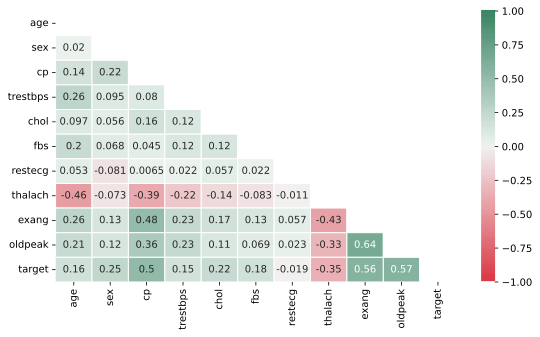

In [9]:
dcorr = df.corr()
mask = np.zeros_like(dcorr)
mask[np.triu_indices_from(mask)] = 1

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10,150,n=100),
           vmin=-1, vmax=1, center=0, linewidths=1,
            annot=True, mask=mask, ax=ax);

In [10]:
g = sns.pairplot(data=df, hue='target')
g.fig.set_size_inches(12,12)

In [11]:
def plot_mn(df, cols, n_rows:int=1) :
    n = len(cols)
    n_cols = np.ceil(n/n_rows).astype(int)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*3))
    ax = ax.ravel()
    fig.tight_layout()
    for i, c in enumerate(cols):
        sns.histplot(data=df[c], kde=True, ax=ax[i])

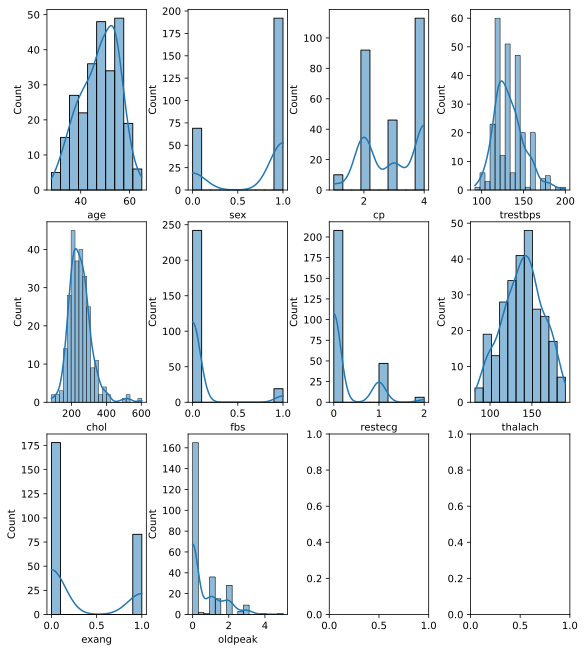

In [12]:
plot_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak']
plot_mn(df, plot_cols, 3)

Check the number of people who has heart disease

In [13]:
df_target = df.groupby('target').size()
df_target

target
0    163
1     98
dtype: int64

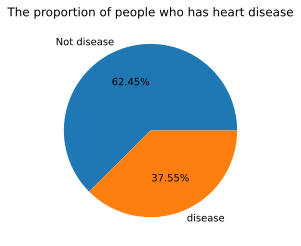

In [14]:
plt.pie(df_target.values, labels=['Not disease', 'disease'], autopct='%.2f%%');
plt.title('The proportion of people who has heart disease');

## Use machine learning

In [15]:
def run_models_score(X_train, X_test, y_train, y_test):
    models = [
        [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
        [KNeighborsClassifier(), 'KNeighborsClassifier'],
        [SVC(kernel='linear'), 'SVC'],
        [GaussianNB(), 'GaussianNB'],
        [GaussianProcessClassifier(), 'GaussianProcessClassifier'],
        [DecisionTreeClassifier(), 'DecisionTreeClassifier'],
        [RandomForestClassifier(), 'RandomForestClassifier'],
        [ExtraTreesClassifier(), 'ExtraTreesClassifier'],
        [GradientBoostingClassifier(), 'GradientBoostingClassifier']
    ]

    model_scores = []
    
    for m in models:
        model = m[0]
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        accuracy = cross_val_score(model, X, y, cv=10)
        model_scores.append([m[1], train_score, test_score, accuracy.mean()])
        
        dModelsScore = pd.DataFrame(model_scores, columns=['Model', 'Train Score', 'Test Score', 'Accuracy Mean'])
        dModelsScore.sort_values(by=['Accuracy Mean'], ascending=False, inplace=True)
        
    return dModelsScore

In [16]:
X = df.drop('target', axis=1) # features values
y = df['target']

#split to train/test data sets
test_ratio = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, stratify=y)

run_models_score(X_train, X_test, y_train, y_test)

Model  Train Score  Test Score  Accuracy Mean
0          LogisticRegression     0.851648    0.835443       0.827635
2                         SVC     0.835165    0.810127       0.823932
3                  GaussianNB     0.818681    0.835443       0.816239
7        ExtraTreesClassifier     1.000000    0.810127       0.758689
6      RandomForestClassifier     1.000000    0.797468       0.724074
8  GradientBoostingClassifier     1.000000    0.822785       0.723932
5      DecisionTreeClassifier     1.000000    0.721519       0.681481
1        KNeighborsClassifier     0.730769    0.645570       0.628348
4   GaussianProcessClassifier     1.000000    0.734177       0.578490

### Find out the importance of features

In [17]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
coef = model.coef_
coef

array([[-0.0246106 ,  1.01206698,  0.58965636, -0.01041046,  0.00388764,
         0.97114769, -0.1863632 , -0.01785927,  0.80757379,  1.12248462]])

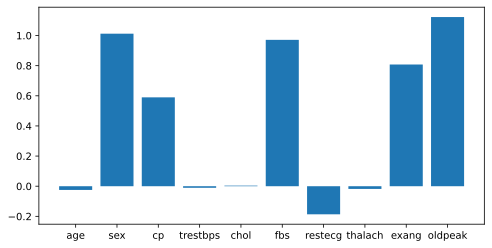

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar([x for x in X.columns], coef[0]);

You can see that there are 5 features that stand out from the others.

## Using RFE (Recusive Feature Elimination)

In [19]:
estimator = LogisticRegression(solver='lbfgs')
selector = RFE(estimator=estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
sel_cols = np.array(X.columns)[selector.support_]

print(f'Selected features : {sel_cols}')

Selected features : ['sex' 'cp' 'fbs' 'exang' 'oldpeak']


In [20]:
X_train_sel = pd.DataFrame(selector.transform(X_train), columns=sel_cols)
X_test_sel = pd.DataFrame(selector.transform(X_test), columns=sel_cols)
X_train_sel.head()

sex   cp  fbs  exang  oldpeak
0  1.0  2.0  0.0    1.0      1.0
1  1.0  4.0  0.0    0.0      0.0
2  1.0  4.0  1.0    1.0      2.0
3  1.0  4.0  0.0    1.0      5.0
4  0.0  3.0  0.0    1.0      0.0

In [21]:
run_models_score(X_train_sel, X_test_sel, y_train, y_test)

Model  Train Score  Test Score  Accuracy Mean
0          LogisticRegression     0.835165    0.822785       0.827635
2                         SVC     0.824176    0.822785       0.823932
3                  GaussianNB     0.829670    0.784810       0.816239
7        ExtraTreesClassifier     0.884615    0.772152       0.762536
6      RandomForestClassifier     0.884615    0.797468       0.724074
8  GradientBoostingClassifier     0.879121    0.835443       0.724074
5      DecisionTreeClassifier     0.884615    0.797468       0.678063
1        KNeighborsClassifier     0.840659    0.759494       0.628348
4   GaussianProcessClassifier     0.846154    0.784810       0.578490

### Calculate the accuracy score

In [22]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_sel, y_train)
y_hat = model.predict(X_test_sel)
print(f'accuracy score = {accuracy_score(y_test, y_hat)}')

accuracy score = 0.8227848101265823


### Plot cunfusion maxtrix

Text(0.5, 1.0, 'Heart Disease Confusion matrix')

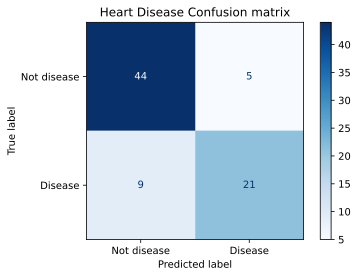

In [23]:
target_names = ['Not disease', 'Disease']
disp = plot_confusion_matrix(model, X_test_sel, y_test,
                            display_labels=target_names,
                            cmap=plt.cm.Blues)
disp.ax_.set_title("Heart Disease Confusion matrix")

In [24]:
# classification report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        49
           1       0.81      0.70      0.75        30

    accuracy                           0.82        79
   macro avg       0.82      0.80      0.81        79
weighted avg       0.82      0.82      0.82        79



In [25]:
y_predicted = model.predict(selector.transform(X))
df['predicted'] = y_predicted
df

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1     29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
3     30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4     31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   
5     32    0   2     105.0  198.0  0.0      0.0    165.0    0.0      0.0   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
289   52    1   4     160.0  331.0  0.0      0.0     94.0    1.0      2.5   
290   54    0   3     130.0  294.0  0.0      1.0    100.0    1.0      0.0   
291   56    1   4     155.0  342.0  1.0      0.0    150.0    1.0      3.0   
292   58    0   2     180.0  393.0  0.0      0.0    110.0    1.0      1.0   
293   65    1   4     130.0  275.0  0.0      1.0    115.0    1.0      1.0   

     target  predicted  
0         0          0  
1         0          0  
3         0          0  
4         0          0  
5         0          0  
..      ...        ...  
289       1          1  
290       1          0  
291       1          1  
292       1          0  
293       1          1  

[261 rows x 12 columns]

## Conclusion

After testing for classifying to find out that, according to all 13 features above, we were able to predict whether a patient had heart disease or not. but all We can reduce the amount of data we have to keep. to be used in future models. By choosing only 5 important data features sex, chest pain type, fasting blood sugar, exercise-induced angina, ST depression induced by exercise relative to rest, which will result in no difference in classification results